# Statistical Thinking in Python - part 1 
# Exploratory Data Analysis

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #Making seaborn the default styling 
data_path = '/Users/User/Desktop/Data/DataCamp-master/04-statistical-thinking-in-python-(part1)/_datasets'
os.chdir(data_path)

## Histograms

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


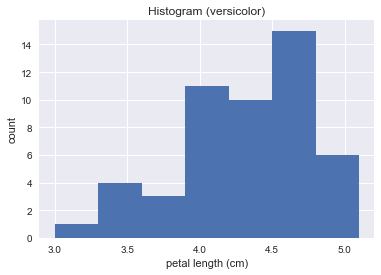

In [95]:
#Calculating the number of bins
versicolor_petal_length = iris[iris['species']=='versicolor']['petal length (cm)']
l = np.size(versicolor_petal_length)
b = int(np.sqrt(l))
#Plotting the histogram
plt.hist(versicolor_petal_length, bins= b);
plt.xlabel('petal length (cm)');
plt.ylabel('count');
plt.title('Histogram (versicolor)');
plt.show()

### Histogram with inbuilt Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14f391d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a150afa90>]], dtype=object)

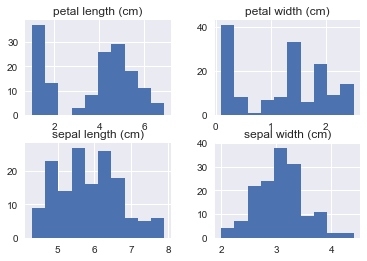

In [6]:
iris.iloc[:,0:4].hist()


## Histogram with Seaborn 

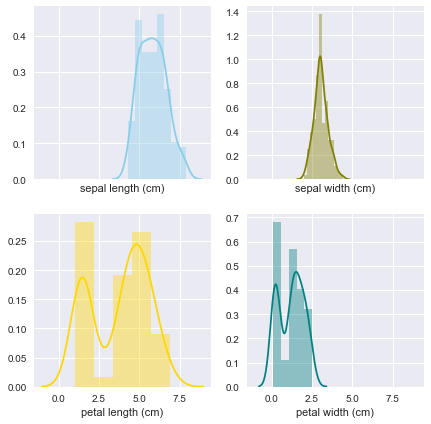

In [7]:
# plot sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( iris["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot( iris["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot( iris["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot( iris["petal width (cm)"] , color="teal", ax=axes[1, 1])


## Bee swarm plots 

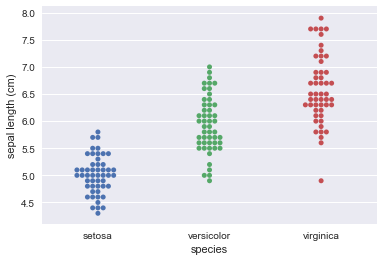

In [13]:
sns.swarmplot(x = "species", y = "sepal length (cm)", data  = iris[["sepal length (cm)",'species']])

## Empirical Cumulative Distribution Function 

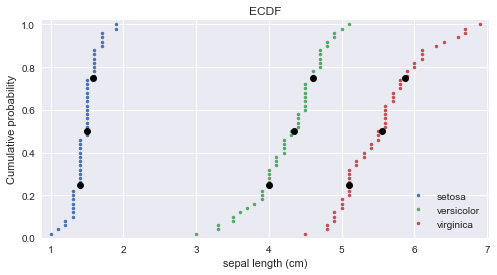

In [265]:
def ECDF_iris():
    species = list(iris['species'].unique())
    plt.figure(figsize = (8,4))
    for s in species: 
        sepal_length = iris[iris["species"] == s]["petal length (cm)"].values
        x = np.sort(sepal_length)
        n = len(x)
        y = np.arange(1, n+1) / n
        percentiles = np.percentile(x, [25,50,75])
        plt.plot(x,y, label = s, linestyle = 'none', marker = '.' ) 
        plt.plot(percentiles, (.25,.50,.75), marker = 'o', color = 'black', linestyle = 'none')

    
    plt.xlabel('sepal length (cm)')
    plt.ylabel('Cumulative probability')
    plt.title('ECDF')
    plt.legend()
    plt.margins(0.02)

ECDF_iris()       

In [113]:
percentiles_length_vers = np.percentile(versicolor_petal_length, [25,60,75])
percentiles_length_vers

array([ 4. ,  4.5,  4.6])

# Summary statistics
## Sample mean and median and percentiles

In [100]:
versicolor_petal_length = iris[iris['species']=='versicolor']['petal length (cm)']
mean_length_vers = np.mean(versicolor_petal_length)
median_length_vers = np.median(versicolor_petal_length)
percentiles_length_vers = np.percentile(versicolor_petal_length, [25,60,75])

## Boxplots and Swarmplots (combined) 

Text(0.5,1,'Box plot - petal length')

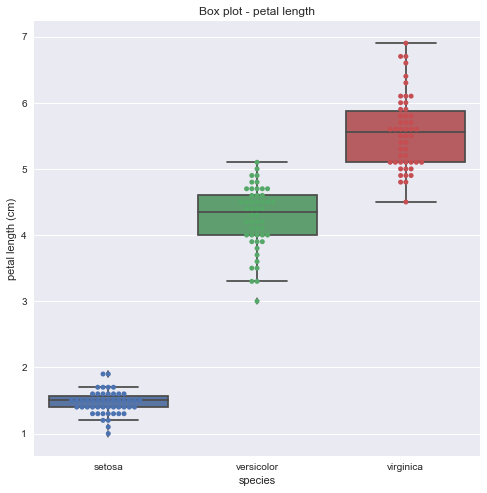

In [111]:
plt.figure(figsize = (8,8))
sns.boxplot(x= iris['species'], y = iris['petal length (cm)'])
sns.swarmplot(x= iris['species'], y = iris['petal length (cm)'])
plt.title('Box plot - petal length')

## Variance and standard deviation 

In [145]:
x = iris[iris['species']=='versicolor']['petal length (cm)'].values
#Compute from first principles
x_mean = np.sum(x) / len(x); print('x_mean = ',x_mean)
x_diff = x - x_mean
x_var = np.sum(np.power(x_diff,2)) / len(x); print('x_var =', x_var)
x_std = np.sqrt(x_var); print('x_std =', x_std)

x_mean =  4.26
x_var = 0.2164
x_std = 0.465188133985


In [146]:
#Computing using np functions
var_length_vers = np.var(versicolor_petal_length); print('np_var =',var_length_vers)
std_dev_length_vers = np.std(versicolor_petal_length); print('np_std =',std_dev_length_vers)

np_var = 0.21640000000000012
np_std = 0.4651881339845204


## Scatter plot with seaborn and pearson's correlation 

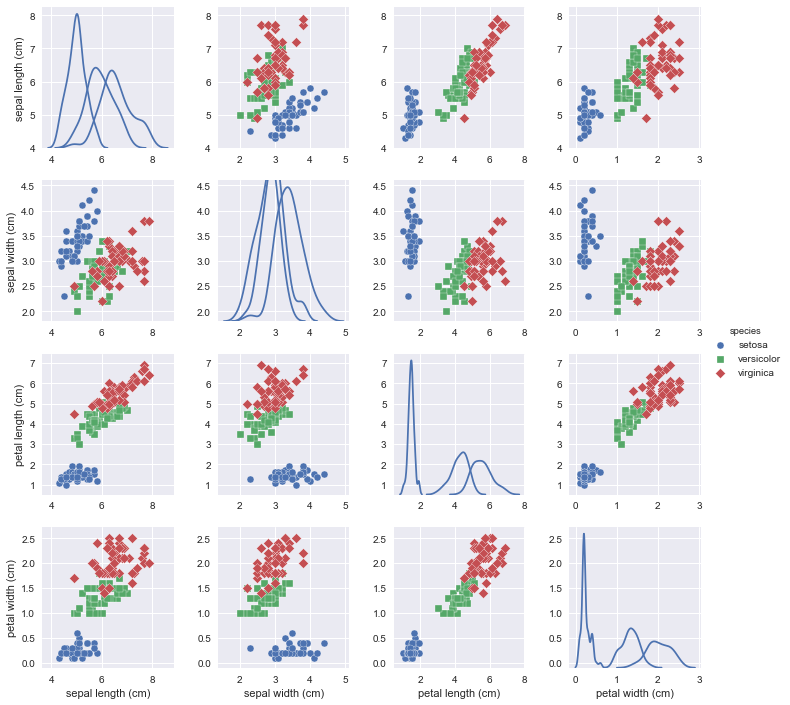

In [150]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"], diag_kind= 'kde')

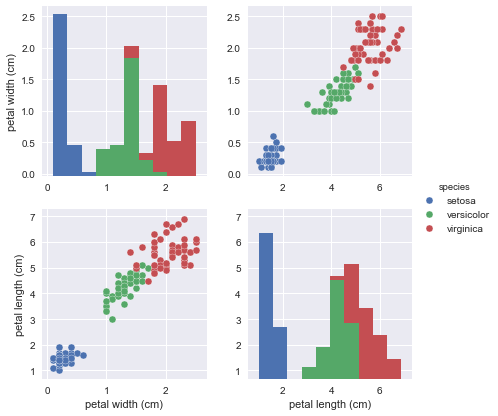

In [154]:
g = sns.pairplot(iris, size=3,vars=["petal width (cm)", "petal length (cm)"], hue = 'species')

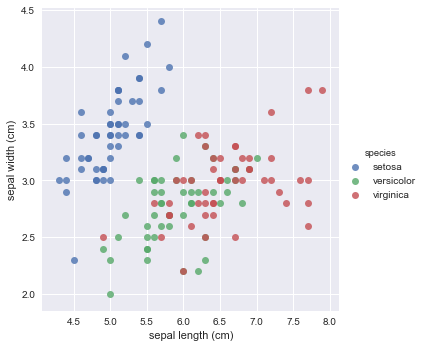

In [168]:
sns.lmplot( x="sepal length (cm)", y="sepal width (cm)", data=iris, fit_reg=False, hue='species', legend=True)

Text(0.5,1,'versicolor')

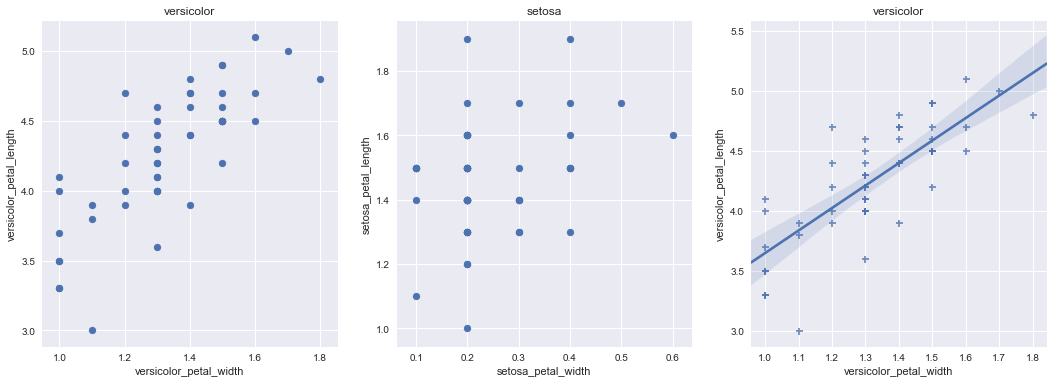

In [196]:
versicolor_petal_width = iris[iris['species']=='versicolor']['petal width (cm)'].values
versicolor_petal_length = iris[iris['species']=='versicolor']['petal length (cm)'].values
setosa_petal_width = iris[iris['species']=='setosa']['petal width (cm)'].values
setosa_petal_length = iris[iris['species']=='setosa']['petal length (cm)'].values


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6))
ax1.scatter(x = versicolor_petal_width,y = versicolor_petal_length )
ax1.set_xlabel('versicolor_petal_width')
ax1.set_ylabel('versicolor_petal_length')
ax1.set_title('versicolor')

ax2.scatter(x = setosa_petal_width,y = setosa_petal_length )
ax2.set_xlabel('setosa_petal_width')
ax2.set_ylabel('setosa_petal_length')
ax2.set_title('setosa')

ax3 = sns.regplot(x=versicolor_petal_width, y=versicolor_petal_length, marker="+")
ax3.set_xlabel('versicolor_petal_width')
ax3.set_ylabel('versicolor_petal_length')
ax3.set_title('versicolor')

In [207]:
#Calculating pearsons correlation coefficient
np.corrcoef(x = versicolor_petal_width,y = versicolor_petal_length)


array([[ 1.        ,  0.78666809],
       [ 0.78666809,  1.        ]])

In [214]:
np.cov(versicolor_petal_width, versicolor_petal_length, ddof=True) / ( np.std(versicolor_petal_width, ddof=True) * np.std(versicolor_petal_length, ddof=True))

array([[ 0.42083009,  0.78666809],
       [ 0.78666809,  2.37625592]])

# Probability and random numbers 
### Defining two bernoulli trials functions 
- With numpy vectorized function
- With for loops 

In [295]:
def bernoulli_trials(n = 100,p = 0.05):
    '''Returns the number of successes out of n Bernoulli trials, each of which has probability p of success. 
    #To perform each Bernoulli trial, use the np.random.random() function, which returns a 
    #random number between zero and one.'''
    
    random_numbers = np.random.random(size = n)
    successes = random_numbers < p
    return np.sum(successes)
bernoulli_trials()    

5

In [297]:
def perform_bernoulli_trials(n = 100, p = 0.05):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
perform_bernoulli_trials()

5

### Compare performance of two implementations (factor of 600 difference) 

In [299]:
%timeit perform_bernoulli_trials()

116 µs ± 6.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [300]:
%timeit bernoulli_trials()

30.3 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [301]:
%timeit np.random.binomial(n=100 ,p=0.05,size = 1)

11.8 µs ± 753 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Plot probability distribution of bernoulli trials 

303 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


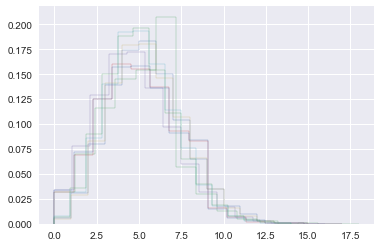

In [370]:
def bernoulli_hist(n= 100, p = 0.05, size = 10000):

    n_defaults = np.empty(size)
    for i in range(size):
        n_defaults[i] = bernoulli_trials(n,p)

    plt.hist(n_defaults, normed = True, bins = 15,histtype = 'step')

%timeit bernoulli_hist()

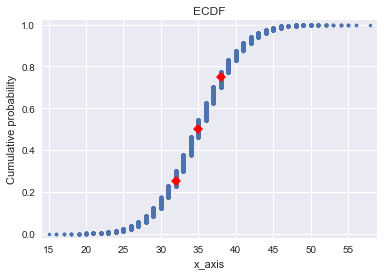

In [385]:
def ECDF(data):
    #plt.figure(figsize = (8,4))
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n+1) / n
    percentiles = np.percentile(x, [25,50,75])
    plt.plot(x,y, linestyle = 'none', marker = '.' ) 
    plt.plot(percentiles, (.25,.50,.75), marker = 'D', color = 'red', linestyle = 'none')
 
    plt.xlabel('x_axis')
    plt.ylabel('Cumulative probability')
    plt.title('ECDF')
    plt.legend()
    plt.margins(0.02)

ECDF(n_defaults)

## Poisson process and poisson distribution 
- Timing of next event is independent of previous event
- Limit of Binomial distribution for low probability of sucess and large number of trials
- i.e. for rare events


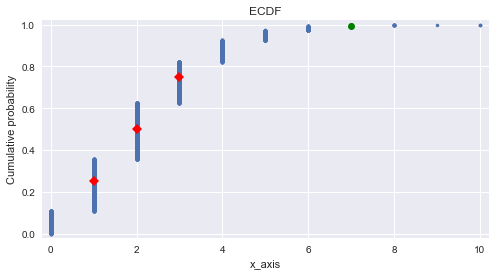

In [356]:
#Given that there are on average 251/115 no-hitters per season, 
#what is the probability of having seven or more in a season?
lamda = 251/115
n_no_hitters = np.random.poisson(lamda,size = 10000)
numb_greater_than_7=np.sum(n_no_hitters >= 7)
prob_greater_than_7 = (numb_greater_than_7 / 10000)
ECDF(np.random.poisson(lamda,size = 10000))
plt.plot(7, 1-prob_greater_than_7 , marker = 'o', color = 'green', linestyle = 'none' )


In [350]:
prob_greater_than_7

0.0067999999999999996

(array([  3.60700000e+04,   2.66440000e+04,   1.94880000e+04,
          1.07560000e+04,   4.54600000e+03,   2.28400000e+03,
          1.65000000e+02,   4.00000000e+01,   5.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

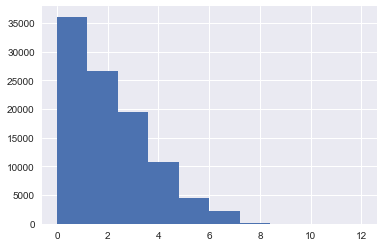

In [374]:
plt.hist(np.random.poisson(lamda,size = 100000), bins = 10)

## Normal distribution
Comparing the speed of light distribution with the theoretical normal distribution
Using the ECDF to plot the cumulative distribution function which is easier to compare than the PDF

In [393]:
os.listdir()

['2008_all_states.csv',
 '2008_swing_states.csv',
 'belmont.csv',
 'iris.csv',
 'michelson_speed_of_light.csv']

In [396]:
data = pd.read_csv('michelson_speed_of_light.csv')

In [397]:
speed_of_light = data['velocity of light in air (km/s)'].values
mean_speed = np.mean(speed_of_light)
std_speed = np.std(speed_of_light)
normal_model = np.random.normal(mean_speed,std_speed,size=100000)

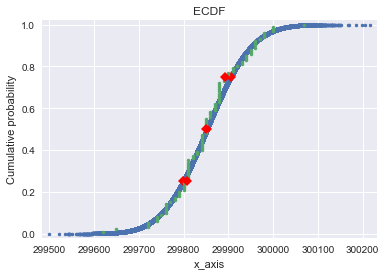

In [398]:
ECDF(normal_model)
ECDF(speed_of_light)

## Exponential distribution 